In [1]:
import pandas as pd
import sklearn
import numpy as np
import random

import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import math
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.tree import DecisionTreeRegressor

In [3]:
batman_data = pd.read_csv('Train.csv')

In [4]:
batman_data

pickup_datetime  NumberOfPassengers  duration    pickup_x  \
0       2034-01-30 10:24:44                   1       724  162.837930   
1       2034-03-09 23:10:11                   1       127  150.375222   
2       2034-05-02 20:23:17                   6       386  156.586093   
3       2034-06-21 17:51:55                   1      1192  161.738726   
4       2034-05-15 18:38:15                   2       315  174.419521   
...                     ...                 ...       ...         ...   
999995  2034-04-29 04:09:43                   1      1487  172.295246   
999996  2034-06-28 16:32:32                   1       194  156.652918   
999997  2034-03-01 19:47:01                   1       353  177.361150   
999998  2034-05-16 06:14:23                   2      1831  -58.798673   
999999  2034-03-17 11:02:10                   1      1036  144.911340   

          pickup_y   dropoff_x   dropoff_y  
0       341.187316  160.391473  367.907042  
1       307.042187  152.623686  318.383231  
2       333.063670  169.397955  315.001104  
3       344.609009  167.702052  310.817653  
4       344.441542  165.780203  344.275954  
...            ...         ...         ...  
999995  358.648104  237.915563  150.020402  
999996  319.595856  149.342454  308.040095  
999997  364.699602  176.032965  345.657303  
999998  415.754211   51.264798  222.600527  
999999  282.964009  170.905966  349.752725  

[1000000 rows x 7 columns]

In [5]:
batman_data.dtypes

pickup_datetime        object
NumberOfPassengers      int64
duration                int64
pickup_x              float64
pickup_y              float64
dropoff_x             float64
dropoff_y             float64
dtype: object

### Converting to timestamp

In [6]:
batman_data['pickup_datetime'] = pd.to_datetime(batman_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')

In [7]:
batman_data['pickup_datetime']

0        2034-01-30 10:24:44
1        2034-03-09 23:10:11
2        2034-05-02 20:23:17
3        2034-06-21 17:51:55
4        2034-05-15 18:38:15
                 ...        
999995   2034-04-29 04:09:43
999996   2034-06-28 16:32:32
999997   2034-03-01 19:47:01
999998   2034-05-16 06:14:23
999999   2034-03-17 11:02:10
Name: pickup_datetime, Length: 1000000, dtype: datetime64[ns]

In [8]:
batman_data['pickup_month'] = batman_data['pickup_datetime'].dt.month
batman_data['pickup_week'] = batman_data['pickup_datetime'].dt.week
batman_data['pickup_day'] = batman_data['pickup_datetime'].dt.day
batman_data['pickup_hour'] = batman_data['pickup_datetime'].dt.hour
batman_data['pickup_minute'] = batman_data['pickup_datetime'].dt.minute
batman_data['pickup_dayofweek'] = batman_data['pickup_datetime'].dt.dayofweek

In [9]:
batman_data = batman_data.drop(columns=['pickup_datetime'])

In [10]:
batman_data

NumberOfPassengers  duration    pickup_x    pickup_y   dropoff_x  \
0                        1       724  162.837930  341.187316  160.391473   
1                        1       127  150.375222  307.042187  152.623686   
2                        6       386  156.586093  333.063670  169.397955   
3                        1      1192  161.738726  344.609009  167.702052   
4                        2       315  174.419521  344.441542  165.780203   
...                    ...       ...         ...         ...         ...   
999995                   1      1487  172.295246  358.648104  237.915563   
999996                   1       194  156.652918  319.595856  149.342454   
999997                   1       353  177.361150  364.699602  176.032965   
999998                   2      1831  -58.798673  415.754211   51.264798   
999999                   1      1036  144.911340  282.964009  170.905966   

         dropoff_y  pickup_month  pickup_week  pickup_day  pickup_hour  \
0       367.907042             1            5          30           10   
1       318.383231             3           10           9           23   
2       315.001104             5           18           2           20   
3       310.817653             6           25          21           17   
4       344.275954             5           20          15           18   
...            ...           ...          ...         ...          ...   
999995  150.020402             4           17          29            4   
999996  308.040095             6           26          28           16   
999997  345.657303             3            9           1           19   
999998  222.600527             5           20          16            6   
999999  349.752725             3           11          17           11   

        pickup_minute  pickup_dayofweek  
0                  24                 0  
1                  10                 3  
2                  23                 1  
3                  51                 2  
4                  38                 0  
...               ...               ...  
999995              9                 5  
999996             32                 2  
999997             47                 2  
999998             14                 1  
999999              2                 4  

[1000000 rows x 12 columns]

In [11]:
batman_data.corr()

NumberOfPassengers  duration  pickup_x  pickup_y  \
NumberOfPassengers            1.000000  0.014872 -0.004444  0.000679   
duration                      0.014872  1.000000 -0.394673  0.186713   
pickup_x                     -0.004444 -0.394673  1.000000 -0.316391   
pickup_y                      0.000679  0.186713 -0.316391  1.000000   
dropoff_x                    -0.000559 -0.303248  0.305295  0.009238   
dropoff_y                    -0.001947  0.061433  0.004337  0.382842   
pickup_month                 -0.002897  0.060065 -0.007372  0.003245   
pickup_week                  -0.004201  0.062520 -0.007438  0.005380   
pickup_day                   -0.001631 -0.002379  0.000885  0.001809   
pickup_hour                   0.009182  0.029620 -0.005988  0.024949   
pickup_minute                 0.000555 -0.010321  0.003224 -0.004174   
pickup_dayofweek              0.025250 -0.034065 -0.000176 -0.046165   

                    dropoff_x  dropoff_y  pickup_month  pickup_week  \
NumberOfPassengers  -0.000559  -0.001947     -0.002897    -0.004201   
duration            -0.303248   0.061433      0.060065     0.062520   
pickup_x             0.305295   0.004337     -0.007372    -0.007438   
pickup_y             0.009238   0.382842      0.003245     0.005380   
dropoff_x            1.000000  -0.095084     -0.008402    -0.007590   
dropoff_y           -0.095084   1.000000      0.004949     0.005389   
pickup_month        -0.008402   0.004949      1.000000     0.985668   
pickup_week         -0.007590   0.005389      0.985668     1.000000   
pickup_day           0.002382  -0.001549     -0.235366    -0.072733   
pickup_hour          0.044038  -0.021684     -0.003617    -0.000235   
pickup_minute        0.005608  -0.003894     -0.000782    -0.000956   
pickup_dayofweek    -0.017102  -0.015651     -0.010993    -0.050106   

                    pickup_day  pickup_hour  pickup_minute  pickup_dayofweek  
NumberOfPassengers   -0.001631     0.009182       0.000555          0.025250  
duration             -0.002379     0.029620      -0.010321         -0.034065  
pickup_x              0.000885    -0.005988       0.003224         -0.000176  
pickup_y              0.001809     0.024949      -0.004174         -0.046165  
dropoff_x             0.002382     0.044038       0.005608         -0.017102  
dropoff_y            -0.001549    -0.021684      -0.003894         -0.015651  
pickup_month         -0.235366    -0.003617      -0.000782         -0.010993  
pickup_week          -0.072733    -0.000235      -0.000956         -0.050106  
pickup_day            1.000000     0.001600      -0.000801         -0.005498  
pickup_hour           0.001600     1.000000      -0.003718         -0.084700  
pickup_minute        -0.000801    -0.003718       1.000000          0.000567  
pickup_dayofweek     -0.005498    -0.084700       0.000567          1.000000

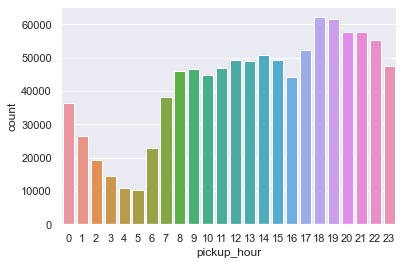

In [12]:
sns.countplot(x=batman_data['pickup_hour'])

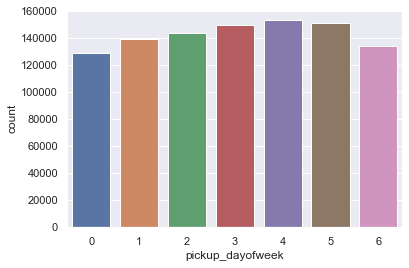

In [13]:
sns.countplot(x=batman_data['pickup_dayofweek'])

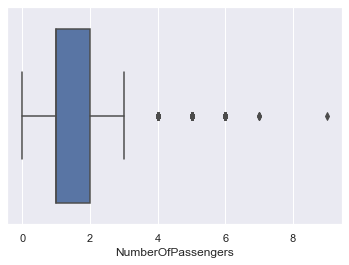

In [14]:
sns.boxplot(x=batman_data['NumberOfPassengers'])

In [15]:
print((batman_data[batman_data['NumberOfPassengers'] <4]).count())

print((batman_data[batman_data['NumberOfPassengers'] >=4]).count())

NumberOfPassengers    893923
duration              893923
pickup_x              893923
pickup_y              893923
dropoff_x             893923
dropoff_y             893923
pickup_month          893923
pickup_week           893923
pickup_day            893923
pickup_hour           893923
pickup_minute         893923
pickup_dayofweek      893923
dtype: int64
NumberOfPassengers    106077
duration              106077
pickup_x              106077
pickup_y              106077
dropoff_x             106077
dropoff_y             106077
pickup_month          106077
pickup_week           106077
pickup_day            106077
pickup_hour           106077
pickup_minute         106077
pickup_dayofweek      106077
dtype: int64


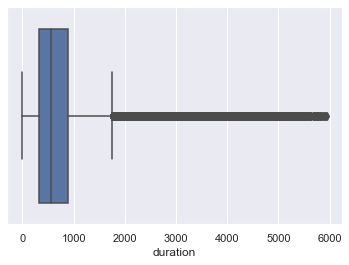

In [16]:
sns.boxplot(x=batman_data['duration'])

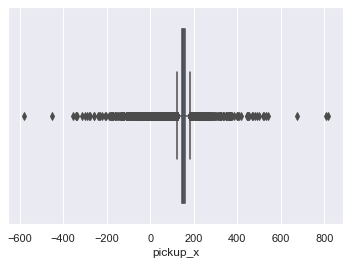

In [17]:
sns.boxplot(x=batman_data['pickup_x'])

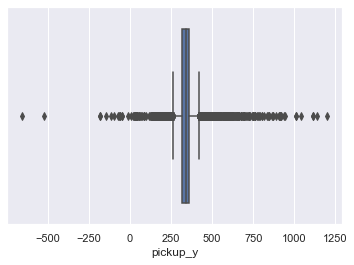

In [18]:
sns.boxplot(x=batman_data['pickup_y'])

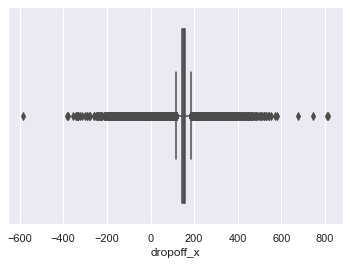

In [19]:
sns.boxplot(x=batman_data['dropoff_x'])

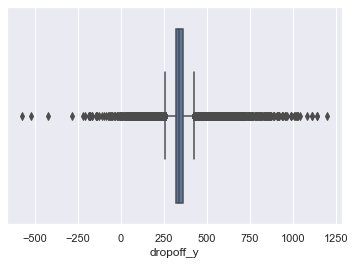

In [20]:
sns.boxplot(x=batman_data['dropoff_y'])

### Calculate Distance between pick up and drop off

In [21]:
batman_data['pickup_dropoff_distance'] = (batman_data['pickup_x'] - batman_data['dropoff_x'])**2 + (batman_data['pickup_y'] - batman_data['dropoff_y'])**2

In [22]:
batman_data['pickup_dropoff_distance'] = batman_data.apply(lambda x: math.sqrt(x['pickup_dropoff_distance']),axis=1)

### Date time features

In [23]:
batman_data['isWeekend'] = batman_data.apply(lambda x: 1 if ((x['pickup_dayofweek']==5) or (x['pickup_dayofweek']==6)) else 0, axis=1)

In [24]:
rushhour_list = [6,7,8,9,10,15,16,17,18,19]
batman_data['isRushhour'] = batman_data.apply(lambda x: 1 if x['pickup_hour'] in rushhour_list else 0,axis=1)

In [33]:
batman_data = batman_data[batman_data['duration']>0]
batman_data.shape

(999993, 15)

In [34]:
batman_data[batman_data['duration']==0]

Empty DataFrame
Columns: [NumberOfPassengers, duration, pickup_x, pickup_y, dropoff_x, dropoff_y, pickup_month, pickup_week, pickup_day, pickup_hour, pickup_minute, pickup_dayofweek, pickup_dropoff_distance, isWeekend, isRushhour]
Index: []

### Splitting the data

In [35]:
y = batman_data['duration']
X = batman_data.drop(columns=['duration'])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Plotting normal y_train and log transformed y_train:

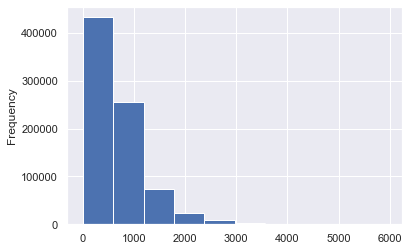

In [37]:
y_train.plot.hist()

In [39]:
log_y_train = np.log1p(y_train)

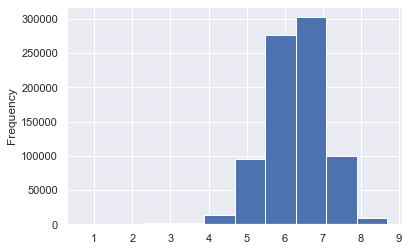

In [40]:
log_y_train.plot.hist()

### Linear Regression

In [41]:
linear_regr = linear_model.LinearRegression()

In [42]:
linear_regr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = linear_regr.predict(X_test)

In [44]:
print(mean_squared_error(y_test,y_pred))

114569.73722574933


In [45]:
r2_score(y_test, y_pred)

0.6101200409008235

In [46]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

66.92

### Lasso

In [47]:
lasso_regr = linear_model.Lasso(alpha=0.5,
                max_iter=11500)

In [48]:
lasso_regr.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=11500)

In [49]:
y_pred = lasso_regr.predict(X_test)

In [50]:
print(mean_squared_error(y_test,y_pred))

114577.29358278697


In [51]:
r2_score(y_test, y_pred)

0.6100943266743262

In [52]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

66.94

### Decision Tree

In [53]:
dt_regr = DecisionTreeRegressor()

In [54]:
dt_regr.fit(X_train,y_train)

DecisionTreeRegressor()

In [55]:
y_pred = dt_regr.predict(X_test)

In [56]:
print(mean_squared_error(y_test,y_pred))

122148.11500557503


In [57]:
r2_score(y_test, y_pred)

0.5843308779823937

In [58]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

56.24

### XGBoost:

In [59]:
import sklearn
import xgboost
xgb_regr = xgboost.XGBRegressor()

In [61]:
xgb_regr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred = xgb_regr.predict(X_test)

In [63]:
print(mean_squared_error(y_test,y_pred))

57054.47912477537


In [64]:
r2_score(y_test, y_pred)

0.8058440341557067

In [65]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

41.85

### changing parameters for xbg

In [66]:
xgb_regr = xgboost.XGBRegressor(min_child_weight=1,
              gamma=0.5,
              subsample=0.8,
              colsample_bytree=0.7,
              max_depth=3,
              learning_rate=0.01,
              n_estimators=5000)

In [67]:
xgb_regr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_pred = xgb_regr.predict(X_test)

In [69]:
print(mean_squared_error(y_test,y_pred))

66621.92883948752


In [70]:
r2_score(y_test, y_pred)

0.7732860743158805

In [71]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

46.04

### Gradient Boost:

In [72]:
model_gb = GradientBoostingRegressor()

In [73]:
model_gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [74]:
y_pred = model_gb.predict(X_test)

In [75]:
print(mean_squared_error(y_test,y_pred))

76586.37040078636


In [76]:
r2_score(y_test, y_pred)

0.7393771541905736

In [77]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

48.21

### Random Forest:

In [78]:
model_rf = RandomForestRegressor() 

In [79]:
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [80]:
y_pred = model_rf.predict(X_test)

In [81]:
print(mean_squared_error(y_test,y_pred))

57092.692347053235


In [82]:
r2_score(y_test, y_pred)

0.8057139948460295

In [83]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

44.67

### Using Log transformed y_train to build models:

### Linear Regression

In [84]:
linear_regr = linear_model.LinearRegression()

In [85]:
linear_regr.fit(X_train,log_y_train)

LinearRegression()

In [86]:
y_pred = linear_regr.predict(X_test)

In [87]:
print(mean_squared_error(y_test,y_pred))

767459.390523114


In [88]:
r2_score(y_test, y_pred)

-1.6116585673741262

In [89]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.37

### Lasso

In [90]:
lasso_regr = linear_model.Lasso(alpha=0.5,
                max_iter=11500)

In [91]:
lasso_regr.fit(X_train,log_y_train)

Lasso(alpha=0.5, max_iter=11500)

In [92]:
y_pred = lasso_regr.predict(X_test)

In [93]:
print(mean_squared_error(y_test,y_pred))

767481.5982184572


In [94]:
r2_score(y_test, y_pred)

-1.6117341399953244

In [95]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.36

### Decision Tree

In [96]:
dt_regr = DecisionTreeRegressor()

In [97]:
dt_regr.fit(X_train,log_y_train)

DecisionTreeRegressor()

In [98]:
y_pred = dt_regr.predict(X_test)

In [99]:
print(mean_squared_error(y_test,y_pred))

767287.3506522742


In [100]:
r2_score(y_test, y_pred)

-1.6110731169800636

In [101]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.43

### XGBoost:

In [102]:
import sklearn
import xgboost
xgb_regr = xgboost.XGBRegressor()

In [103]:
xgb_regr.fit(X_train,log_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
y_pred = xgb_regr.predict(X_test)

In [105]:
print(mean_squared_error(y_test,y_pred))

767297.8623963807


In [106]:
r2_score(y_test, y_pred)

-1.6111088883666582

In [107]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.42

In [108]:
xgb_regr = xgboost.XGBRegressor(min_child_weight=1,
              gamma=0.5,
              subsample=0.8,
              colsample_bytree=0.7,
              max_depth=3,
              learning_rate=0.01,
              n_estimators=5000)

In [109]:
xgb_regr.fit(X_train,log_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
y_pred = xgb_regr.predict(X_test)

In [111]:
print(mean_squared_error(y_test,y_pred))

767322.7646357369


In [112]:
r2_score(y_test, y_pred)

-1.611193630500984

In [113]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.41

### Gradient Boost:

In [114]:
model_gb = GradientBoostingRegressor()

In [115]:
model_gb.fit(X_train,log_y_train)

GradientBoostingRegressor()

In [116]:
y_pred = model_gb.predict(X_test)

In [117]:
print(mean_squared_error(y_test,y_pred))

767355.2744337682


In [118]:
r2_score(y_test, y_pred)

-1.6113042611005972

In [119]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.41

### Random Forest:

In [120]:
model_rf = RandomForestRegressor() 

In [121]:
model_rf.fit(X_train,log_y_train)

RandomForestRegressor()

In [122]:
y_pred = model_rf.predict(X_test)

In [123]:
print(mean_squared_error(y_test,y_pred))

767292.585123475


In [124]:
r2_score(y_test, y_pred)

-1.6110909298464198

In [125]:
round((np.mean(np.abs(y_test - y_pred) / y_test))*100,2)

98.42